In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('credit_risk_dataset.csv')

In [3]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [7]:
# Column names
df.columns


Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [9]:
# Data types & nulls
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [11]:
df.columns = (
    df.columns
      .str.strip()
      .str.lower()
      .str.replace(" ", "_")
)


In [13]:
# Missing values
df.isnull().sum()


person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [15]:
# Duplicate records
df.duplicated().sum()


165

In [17]:
# Target distribution (IMPORTANT)
df['loan_status'].value_counts(normalize=True)


loan_status
0    0.781836
1    0.218164
Name: proportion, dtype: float64

In [19]:
# Convert numeric columns safely
numeric_cols = [
    'person_age',
    'person_income',
    'person_emp_length',
    'loan_amnt',
    'loan_int_rate',
    'loan_percent_income',
    'cb_person_cred_hist_length'
]

df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')


In [21]:
categorical_cols = [
    'person_home_ownership',
    'loan_intent',
    'loan_grade',
    'cb_person_default_on_file'
]

df[categorical_cols].nunique()


person_home_ownership        4
loan_intent                  6
loan_grade                   7
cb_person_default_on_file    2
dtype: int64

In [23]:
df.to_csv("credit_risk_raw_cleaned.csv", index=False)


In [25]:
# Remove duplicates
df = df.drop_duplicates()

print("Duplicates after removal:", df.duplicated().sum())


Duplicates after removal: 0


In [27]:
df['person_emp_length'] = df['person_emp_length'].fillna(
    df['person_emp_length'].median()
)


In [29]:
df['loan_int_rate'] = df['loan_int_rate'].fillna(
    df['loan_int_rate'].median()
)


In [31]:
df.isnull().sum()


person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [33]:
df = df[(df['person_age'] >= 18) & (df['person_age'] <= 75)]


In [35]:
df = df[df['person_income'] > 0]


In [37]:
df = df[df['loan_amnt'] > 0]


In [39]:
income_cap = df['person_income'].quantile(0.99)
df['person_income'] = df['person_income'].clip(upper=income_cap)


In [41]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
Index: 32406 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32406 non-null  int64  
 1   person_income               32406 non-null  int64  
 2   person_home_ownership       32406 non-null  object 
 3   person_emp_length           32406 non-null  float64
 4   loan_intent                 32406 non-null  object 
 5   loan_grade                  32406 non-null  object 
 6   loan_amnt                   32406 non-null  int64  
 7   loan_int_rate               32406 non-null  float64
 8   loan_status                 32406 non-null  int64  
 9   loan_percent_income         32406 non-null  float64
 10  cb_person_default_on_file   32406 non-null  object 
 11  cb_person_cred_hist_length  32406 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.2+ MB


,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32406.000000,32406.000000,32406.000000,32406.000000,32406.000000,32406.000000,32406.000000,32406.000000
mean,27.721934,64339.691199,4.767173,9593.797445,11.014788,0.218756,0.170262,5.808060
std,6.173177,37776.764579,4.084482,6322.797253,3.083325,0.413409,0.106812,4.050957
min,20.000000,4000.000000,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,38500.000000,2.000000,5000.000000,8.490000,0.000000,0.090000,3.000000
50%,26.000000,55000.000000,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,79200.000000,7.000000,12250.000000,13.110000,0.000000,0.230000,8.000000
max,73.000000,225000.000000,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [43]:
df.to_csv("credit_risk_cleaned.csv", index=False)


In [45]:
df['income_to_loan_ratio'] = df['person_income'] / df['loan_amnt']


In [47]:
df['stable_employment'] = df['person_emp_length'].apply(
    lambda x: 1 if x >= 5 else 0
)


In [49]:
df['high_interest_flag'] = df['loan_int_rate'].apply(
    lambda x: 1 if x >= 15 else 0
)


In [51]:
df['credit_history_strength'] = df['cb_person_cred_hist_length'].apply(
    lambda x: 'short' if x < 3 else ('medium' if x < 7 else 'long')
)


In [53]:
df['income_bucket'] = pd.cut(
    df['person_income'],
    bins=[0, 30000, 60000, 100000, 300000],
    labels=['low', 'medium', 'high', 'very_high']
)


In [55]:
df[['income_to_loan_ratio',
    'stable_employment',
    'high_interest_flag',
    'credit_history_strength',
    'income_bucket']].head()


,income_to_loan_ratio,stable_employment,high_interest_flag,credit_history_strength,income_bucket
0,1.685714,1,1,medium,medium
1,9.600000,1,0,short,low
2,1.745455,0,0,medium,low
3,1.871429,0,1,short,high
4,1.554286,1,0,medium,medium


In [57]:
categorical_cols = [
    'person_home_ownership',
    'loan_intent',
    'loan_grade',
    'cb_person_default_on_file',
    'credit_history_strength',
    'income_bucket'
]


In [59]:
df.to_csv("credit_risk_feature_engineered.csv", index=False)


In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


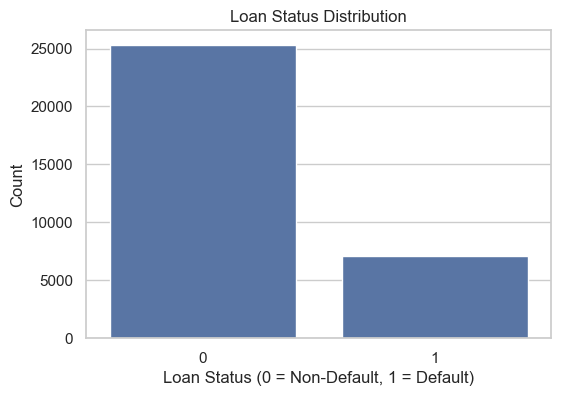

In [63]:
plt.figure(figsize=(6,4))
sns.countplot(x='loan_status', data=df)
plt.title("Loan Status Distribution")
plt.xlabel("Loan Status (0 = Non-Default, 1 = Default)")
plt.ylabel("Count")
plt.show()


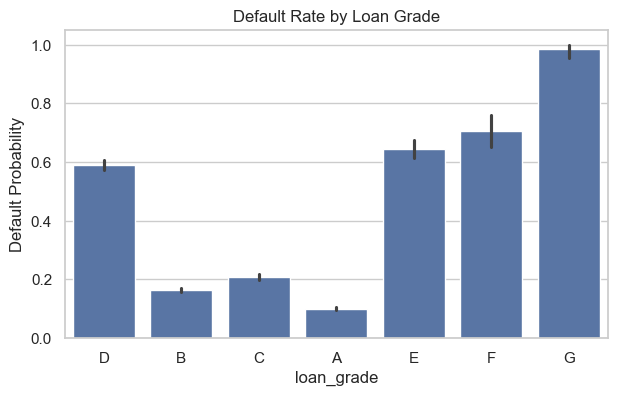

In [65]:
plt.figure(figsize=(7,4))
sns.barplot(x='loan_grade', y='loan_status', data=df)
plt.title("Default Rate by Loan Grade")
plt.ylabel("Default Probability")
plt.show()


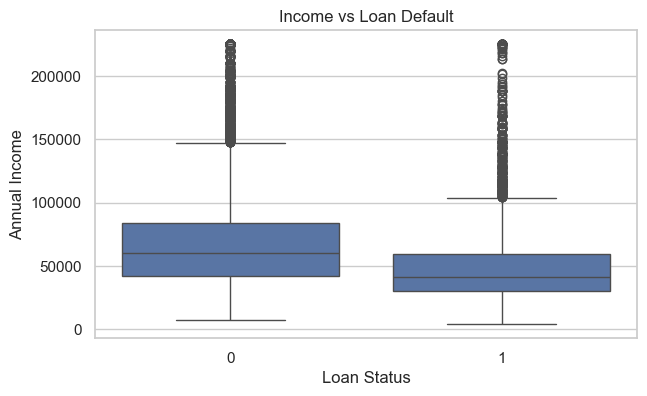

In [67]:
plt.figure(figsize=(7,4))
sns.boxplot(x='loan_status', y='person_income', data=df)
plt.title("Income vs Loan Default")
plt.xlabel("Loan Status")
plt.ylabel("Annual Income")
plt.show()


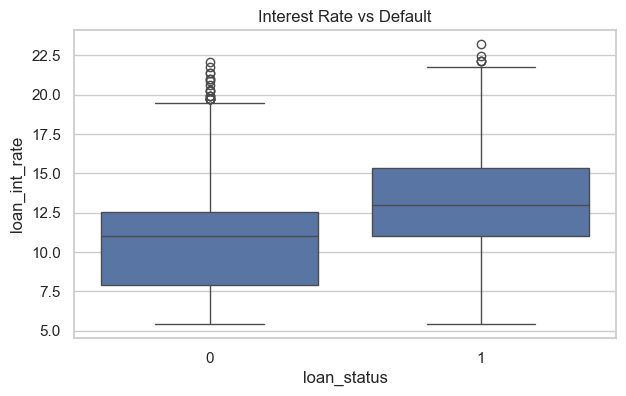

In [69]:
plt.figure(figsize=(7,4))
sns.boxplot(x='loan_status', y='loan_int_rate', data=df)
plt.title("Interest Rate vs Default")
plt.show()


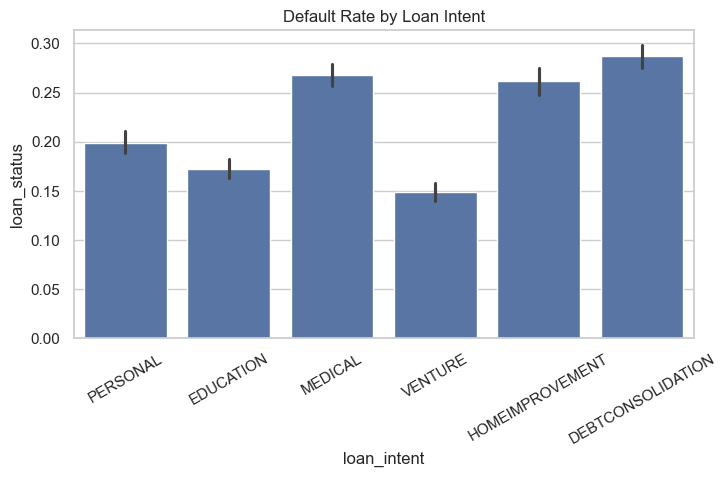

In [71]:
plt.figure(figsize=(8,4))
sns.barplot(x='loan_intent', y='loan_status', data=df)
plt.title("Default Rate by Loan Intent")
plt.xticks(rotation=30)
plt.show()


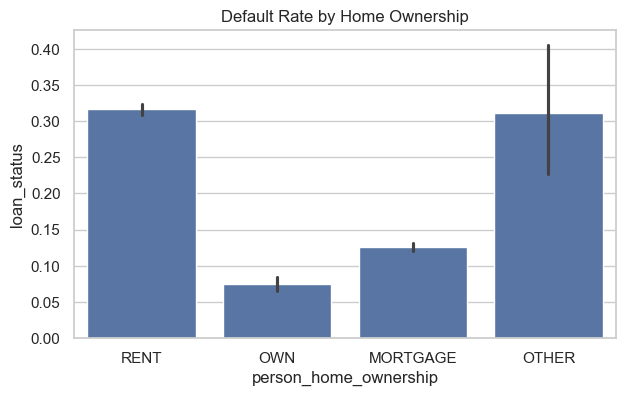

In [73]:
plt.figure(figsize=(7,4))
sns.barplot(x='person_home_ownership', y='loan_status', data=df)
plt.title("Default Rate by Home Ownership")
plt.show()


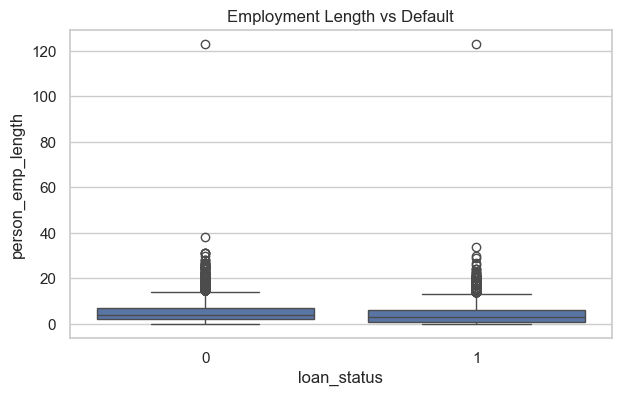

In [75]:
plt.figure(figsize=(7,4))
sns.boxplot(x='loan_status', y='person_emp_length', data=df)
plt.title("Employment Length vs Default")
plt.show()


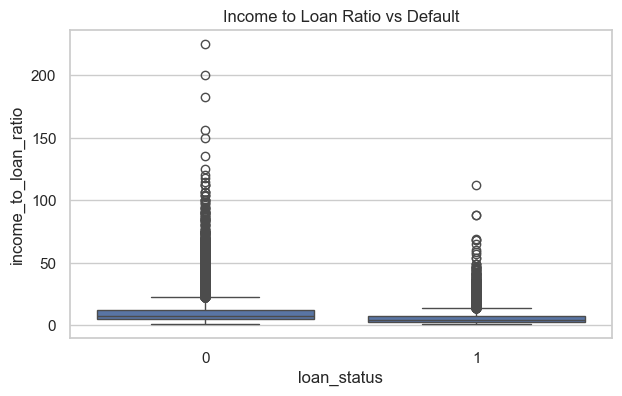

In [77]:
plt.figure(figsize=(7,4))
sns.boxplot(x='loan_status', y='income_to_loan_ratio', data=df)
plt.title("Income to Loan Ratio vs Default")
plt.show()


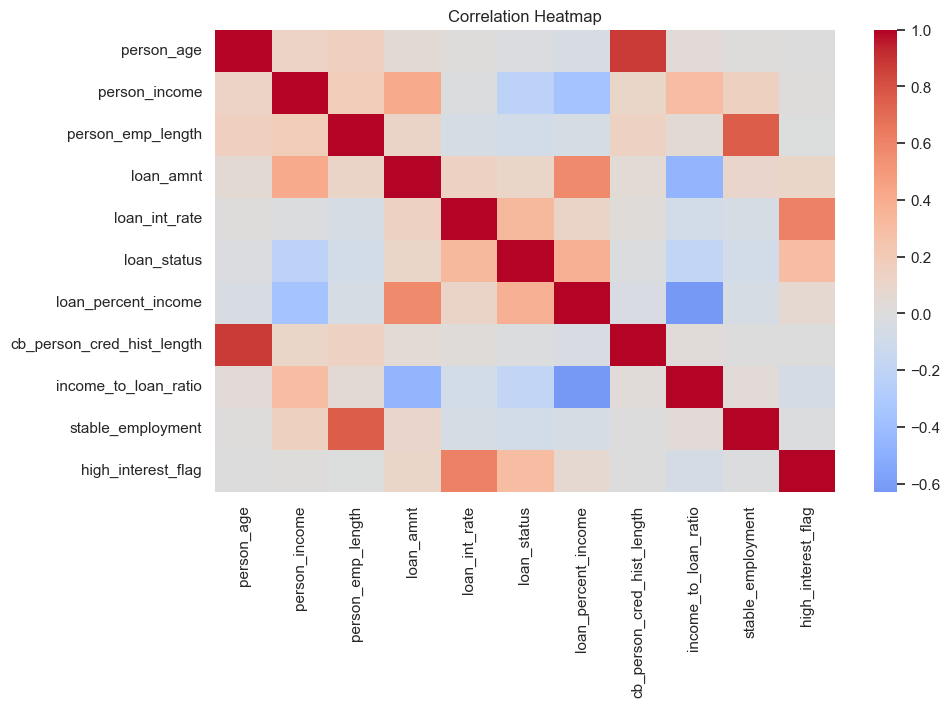

In [79]:
plt.figure(figsize=(10,6))
corr = df.select_dtypes(include=['int64','float64']).corr()

sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap")
plt.show()


In [81]:

X = df.drop('loan_status', axis=1)
y = df['loan_status']


In [83]:
categorical_cols = [
    'person_home_ownership',
    'loan_intent',
    'loan_grade',
    'cb_person_default_on_file',
    'credit_history_strength',
    'income_bucket'
]

numerical_cols = [
    col for col in X.columns if col not in categorical_cols
]


In [85]:
X_encoded = pd.get_dummies(
    X,
    columns=categorical_cols,
    drop_first=True
)


In [87]:
print("Before encoding shape:", X.shape)
print("After encoding shape:", X_encoded.shape)


Before encoding shape: (32406, 16)
After encoding shape: (32406, 30)


In [89]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [91]:
y_train.value_counts(normalize=True)


loan_status
0    0.781245
1    0.218755
Name: proportion, dtype: float64

In [93]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


In [95]:
y_train_smote.value_counts(normalize=True)


loan_status
1    0.5
0    0.5
Name: proportion, dtype: float64

In [97]:
print("Train shape before SMOTE:", X_train.shape)
print("Train shape after SMOTE:", X_train_smote.shape)
print("Test shape:", X_test.shape)


Train shape before SMOTE: (25924, 30)
Train shape after SMOTE: (40506, 30)
Test shape: (6482, 30)


In [99]:
pip install lightgbm


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [101]:
from lightgbm import LGBMClassifier

lgb_model = LGBMClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=-1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

lgb_model.fit(X_train_smote, y_train_smote)


[LightGBM] [Info] Number of positive: 20253, number of negative: 20253
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002964 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1655
[LightGBM] [Info] Number of data points in the train set: 40506, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


LGBMClassifier(colsample_bytree=0.8, learning_rate=0.05, n_estimators=300,
               random_state=42, subsample=0.8)

In [103]:
y_pred = lgb_model.predict(X_test)
y_pred_proba = lgb_model.predict_proba(X_test)[:, 1]


In [105]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test, y_pred_proba)
print("AUC-ROC:", auc)


AUC-ROC: 0.9440672787474069


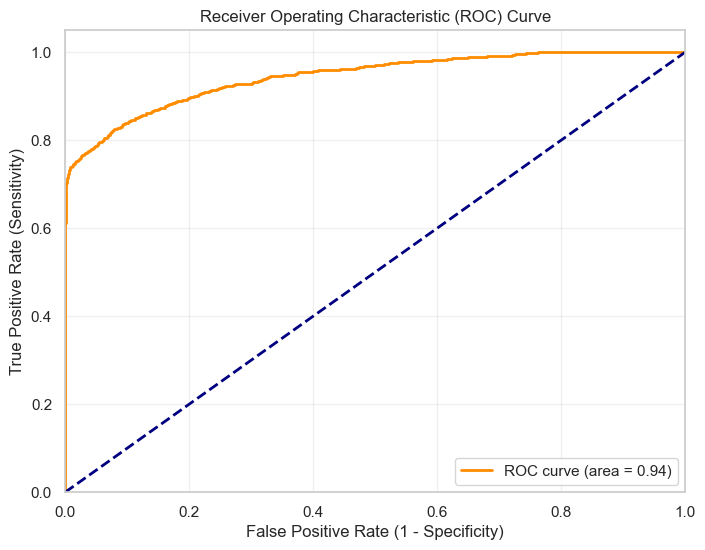

In [127]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# 1. Calculate TPR and FPR for various thresholds
# y_pred_proba should be the probabilities of the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# 2. Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {auc:.2f})')

# 3. Plot the random chance line (diagonal)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# 4. Formatting the chart
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

In [107]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[5009   55]
 [ 369 1049]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      5064
           1       0.95      0.74      0.83      1418

    accuracy                           0.93      6482
   macro avg       0.94      0.86      0.90      6482
weighted avg       0.94      0.93      0.93      6482



In [109]:
import numpy as np
from scipy.stats import ks_2samp

ks = ks_2samp(
    y_pred_proba[y_test == 0],
    y_pred_proba[y_test == 1]
).statistic

print("KS Statistic:", ks * 100)


KS Statistic: 74.53834918682611


In [111]:
import pandas as pd

feature_imp = pd.DataFrame({
    'feature': X_train_smote.columns,
    'importance': lgb_model.feature_importances_
}).sort_values(by='importance', ascending=False)

feature_imp.head(10)


,feature,importance
1,person_income,1690
4,loan_int_rate,870
2,person_emp_length,699
7,income_to_loan_ratio,638
3,loan_amnt,547
0,person_age,497
5,loan_percent_income,482
12,person_home_ownership_RENT,328
15,loan_intent_MEDICAL,315
14,loan_intent_HOMEIMPROVEMENT,257


In [113]:
df_test = X_test.copy()

df_test['actual_loan_status'] = y_test.values
df_test['pd'] = y_pred_proba   # Probability of Default


In [115]:
df_test['risk_score'] = (df_test['pd'] * 1000).round().astype(int)


In [117]:
def risk_band(score):
    if score <= 300:
        return 'Low Risk'
    elif score <= 600:
        return 'Medium Risk'
    else:
        return 'High Risk'

df_test['risk_band'] = df_test['risk_score'].apply(risk_band)


In [119]:
df_test.groupby('risk_band')['actual_loan_status'].mean()


risk_band
High Risk      0.976190
Low Risk       0.060940
Medium Risk    0.296578
Name: actual_loan_status, dtype: float64

In [121]:
def loan_decision(score):
    if score <= 500:
        return 'Approve'
    elif score <= 650:
        return 'Manual Review'
    else:
        return 'Reject'

df_test['loan_decision'] = df_test['risk_score'].apply(loan_decision)


In [123]:
final_output = df_test[[
    'risk_score',
    'risk_band',
    'loan_decision',
    'actual_loan_status'
]]

final_output.head()


,risk_score,risk_band,loan_decision,actual_loan_status
13241,13,Low Risk,Approve,0
25137,1,Low Risk,Approve,0
28065,57,Low Risk,Approve,0
1696,104,Low Risk,Approve,0
20544,101,Low Risk,Approve,0


In [125]:
final_output.to_csv("credit_risk_scored_output.csv", index=False)


In [129]:
import joblib

# Save trained model
joblib.dump(lgb_model, "lgb_model.pkl")

# Save column order (VERY IMPORTANT)
joblib.dump(X_train_smote.columns.tolist(), "columns.pkl")


['columns.pkl']